This notebook consist of Basic Exploratory data analysis and Modelling Techniques I had used to secure a rank under 20.
My rank was 18th out of around 900 participants

Here is the link of leaderboard --https://www.hackerearth.com/challenges/competitive/predict-ad-success-hackerearth-machine-learning-challenge/leaderboard/predict-the-ads-success-5ad8e1dc/



In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns

from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [15, 8]
plt.style.use("fivethirtyeight")

# do not display warnings in notebook 
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.options.display.max_seq_items = 2000

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold,KFold,TimeSeriesSplit,cross_val_score



# Regression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier

import xgboost as xgb
import lightgbm as lgb
#!pip3 install catboost
import catboost as cat

In [2]:
#Import dataset 
train = pd.read_csv("Dataset/Train.csv")
test = pd.read_csv("Dataset/Test.csv")
sample =  pd.read_csv("Dataset/sample_submission.csv")

In [3]:
train.shape

(26048, 12)

In [4]:
test.shape

(6513, 11)

In [5]:
train.head()

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,19717,Married-spouse-absent,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,False
1,31593,Married-civ-spouse,Pharma,Comedy,Male,45,Primetime,United-States,0.027465,Low,No,False
2,5681,Divorced,Entertainment,Comedy,Female,45,Primetime,United-States,0.027465,High,Yes,False
3,15491,Separated,Political,Infomercial,Female,40,Primetime,United-States,0.027465,Low,No,False
4,23587,Married-civ-spouse,Pharma,Comedy,Male,48,Primetime,United-States,0.027465,High,No,True


In [6]:
train['airtime'].value_counts()

Primetime    15652
Morning       8531
Daytime       1865
Name: airtime, dtype: int64

In [7]:
train['targeted_sex'].value_counts()

Male      17245
Female     8803
Name: targeted_sex, dtype: int64

In [8]:
# checking missing data
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train.isnull().count()*100).sort_values(ascending = False)
missing_train = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_train.head()

,Total,Percent
netgain,0,0.0
money_back_guarantee,0,0.0
expensive,0,0.0
ratings,0,0.0
airlocation,0,0.0


In [9]:
train["netgain"].value_counts()

False    19853
True      6195
Name: netgain, dtype: int64

In [10]:
train["average_runtime(minutes_per_week)"].value_counts()

40    12070
50     2216
45     1485
60     1119
20     1064
35     1019
30      959
25      564
55      558
48      422
38      396
15      326
10      213
32      209
70      205
42      193
24      191
65      188
36      172
16      170
44      169
43      136
12      135
8       129
37      114
80      108
52      105
56       86
28       76
99       72
46       66
72       61
18       60
5        49
75       47
4        46
6        44
84       42
2        40
54       38
22       38
90       33
41       31
17       31
47       31
3        30
33       29
49       28
14       27
26       26
39       24
23       23
21       23
7        23
58       21
53       19
34       18
66       18
13       18
27       17
9        16
57       14
98       13
62       13
63       11
1        11
64        9
78        9
68        8
85        7
11        7
19        6
77        6
81        6
31        5
96        5
73        4
89        4
95        3
51        3
29        3
82        2
67        2
88  

In [11]:
train["ratings"].value_counts()

0.027465    23736
0.173580      303
0.102234      227
0.098441      201
1.000000      143
0.077823       82
0.057643       78
0.070120       60
0.076218       55
0.059802       54
0.111240       49
0.164438       47
0.066989       36
0.054978       30
0.129776       30
0.057973       30
0.048608       30
0.072688       29
0.055523       28
0.298105       27
0.159245       27
0.065472       26
0.061154       24
0.003978       23
0.033242       23
0.074020       23
0.222470       22
0.094074       18
0.080517       18
0.048627       18
0.052722       17
0.118748       15
0.048880       15
0.037725       14
0.061222       14
0.272896       14
0.067349       13
0.050874       13
0.065802       12
0.002577       12
0.042111       12
0.064596       12
0.074779       11
0.166967       11
0.003696       11
0.053091       11
0.050358       10
0.089883       10
0.060638       10
0.002694       10
0.099851        9
0.064237        9
0.070412        9
0.047937        9
0.051418        9
0.038659  

In [12]:
numeric_features=["average_runtime(minutes_per_week)","ratings"]

In [13]:
train.columns

Index(['id', 'realtionship_status', 'industry', 'genre', 'targeted_sex',
       'average_runtime(minutes_per_week)', 'airtime', 'airlocation',
       'ratings', 'expensive', 'money_back_guarantee', 'netgain'],
      dtype='object')

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26048 entries, 0 to 26047
Data columns (total 12 columns):
id                                   26048 non-null int64
realtionship_status                  26048 non-null object
industry                             26048 non-null object
genre                                26048 non-null object
targeted_sex                         26048 non-null object
average_runtime(minutes_per_week)    26048 non-null int64
airtime                              26048 non-null object
airlocation                          26048 non-null object
ratings                              26048 non-null float64
expensive                            26048 non-null object
money_back_guarantee                 26048 non-null object
netgain                              26048 non-null bool
dtypes: bool(1), float64(1), int64(2), object(8)
memory usage: 2.2+ MB


In [15]:
cat_features=[ 'realtionship_status', 'industry', 'genre', 'targeted_sex', 'airtime', 'airlocation', 'expensive', 'money_back_guarantee']

In [16]:
# Label Encoding
for f in train.columns:
    if  train[f].dtype=='object': 
        lbl = LabelEncoder()
        lbl.fit(list(train[f].values) + list(test[f].values))
        train[f] = lbl.transform(list(train[f].values))
        test[f] = lbl.transform(list(test[f].values))  
train = train.reset_index()
test = test.reset_index()

In [17]:
train.drop('index',inplace=True,axis=1)
train.set_index('id',inplace=True)

In [18]:
test.drop('index',inplace=True,axis=1)
test.set_index('id',inplace=True)

In [19]:
test.head()

,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee
id,,,,,,,,,,
1,6,0,0,0,10,0,39,0.027465,1,0
4,2,4,0,1,40,1,39,0.056262,0,1
5,0,2,0,0,50,1,39,0.027465,1,0
9,2,4,3,1,40,2,39,0.027465,1,0
10,2,4,0,1,40,2,39,0.027465,1,1


In [20]:
f = lambda x: 1 if x==True else 0
train["netgain"]=train["netgain"].apply(f)

In [21]:
target="netgain"
feat = train.columns.tolist()
feat.remove(target)
print("Feature Length : {}".format(len(feat)))

Feature Length : 10


In [22]:
X=train[feat]
y=train[target]

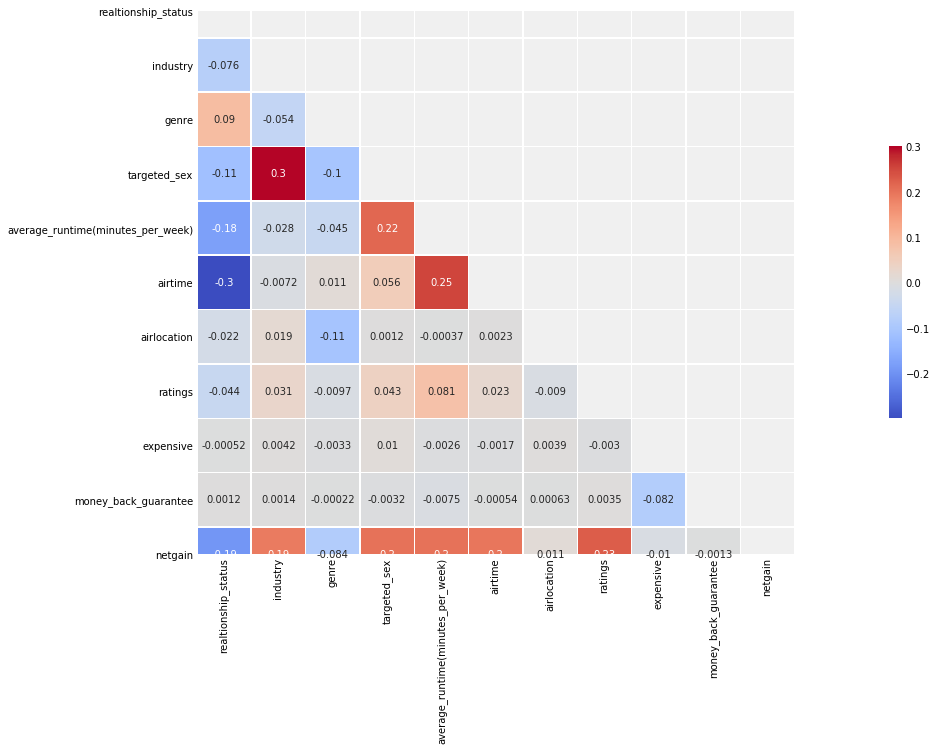

In [23]:
import numpy as np
corr = train.corr()
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(30,10))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True,cmap = "coolwarm")

In [24]:
train.head()

,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
id,,,,,,,,,,,
19717,3,0,0,1,45,2,39,0.027465,0,0,0
31593,2,4,0,1,45,2,39,0.027465,1,0,0
5681,0,2,0,0,45,2,39,0.027465,0,1,0
15491,5,5,3,0,40,2,39,0.027465,1,0,0
23587,2,4,0,1,48,2,39,0.027465,0,0,1


In [25]:
trainX, validX = train_test_split(train, test_size=0.2, shuffle=False, random_state=13)
print("Train Shape : {}\nValid Shape : {}".format(trainX.shape, validX.shape))

Train Shape : (20838, 11)
Valid Shape : (5210, 11)


In [26]:
X = np.array(train[feat])
y = np.array(train[target])

In [27]:
trainX, validX, trainY, validY = train_test_split(train[feat], train[target], shuffle=False, test_size=0.2, random_state=13)

In [28]:
validX=np.array(validX)
validY=np.array(validY)

In [31]:
from sklearn.model_selection import KFold # import KFold
from numpy import mean
from numpy import std
import numpy
from numpy import array
from numpy import argmax
 
# evaluate a single mlp model
def evaluate_model(trainX, trainy, testX, testy):
    estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=3,
     min_child_weight=1, gamma=0.2, subsample=0.7, colsample_bytree=0.7,reg_alpha= 0.01,
     objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)
    estimator.fit(trainX, trainy)
    test_acc=estimator.score(testX,testy)
    return estimator, test_acc
 
# make an ensemble prediction for multi-class classification
def ensemble_predictions(members, testX):
    # make predictions
    yhats = [model.predict(testX) for model in members]
    yhats = array(yhats)
    # sum across ensemble members
    summed = numpy.sum(yhats, axis=0)
    # argmax across classes
    result = argmax(summed, axis=1)
    return result
 
# evaluate a specific number of members in an ensemble
def evaluate_n_members(members, n_members, testX, testy):
	# select a subset of members
	subset = members[:n_members]
	# make prediction
	yhat = ensemble_predictions(subset, testX)
	# calculate accuracy
	return accuracy_score(testy, yhat)
 

# multiple train-test splits
kf = KFold(n_splits=10)
scores, members,summd = list(), list(),list()
for train_index, test_index in kf.split(X):
        # select indexes
        # select data
        trainX, testX =X[train_index], X[test_index]
        trainy, testy = y[train_index], y[test_index]
        # evaluate model
        model, test_acc = evaluate_model(trainX, trainy, testX, testy)
        print('>%.3f' % test_acc)
        scores.append(test_acc)
        members.append(model)
        yhats=model.predict(testX)
        yhats = array(yhats)
        summed = numpy.sum(yhats, axis=)
        # argmax across classes
        summd.append(summed)
# summarize expected performance
print('Estimated Accuracy %.3f (%.3f)' % (mean(scores), std(scores)))


>0.815


AxisError: axis 1 is out of bounds for array of dimension 1

In [72]:
summd

[384, 412, 394, 414, 435, 432, 410, 450, 383, 431]

In [74]:
result = argmax(summd)

In [76]:
accuracy_score(testy, result)

TypeError: Singleton array 7 cannot be considered a valid collection.

In [52]:
from sklearn.metrics import accuracy_score

# evaluate different numbers of ensembles on hold out set
single_scores, ensemble_scores = list(), list()
for i in range(1, n_splits+1):
	ensemble_score = evaluate_n_members(members, i, validX, validY)
	_, single_score = members[i-1].evaluate(validX, validY, verbose=0)
	print('> %d: single=%.3f, ensemble=%.3f' % (i, single_score, ensemble_score))
	ensemble_scores.append(ensemble_score)
	single_scores.append(single_score)
# plot score vs number of ensemble members
print('Accuracy %.3f (%.3f)' % (mean(single_scores), std(single_scores)))
x_axis = [i for i in range(1, n_splits+1)]
pyplot.plot(x_axis, single_scores, marker='o', linestyle='None')
pyplot.plot(x_axis, ensemble_scores, marker='o')
pyplot.show()

AxisError: axis 1 is out of bounds for array of dimension 1

In [48]:
pred_final = sclf.predict(test)
pred_final

array([0, 0, 0, ..., 0, 0, 0])

In [49]:
pred=pd.DataFrame(pred_final,index=test.index) 

In [50]:
pred.rename(columns={0:'netgain'}, inplace=True)

In [51]:
f = lambda x: True if x==1 else False
pred["netgain"]=pred["netgain"].apply(f)

In [52]:
pred["netgain"].value_counts()

False    5511
True     1002
Name: netgain, dtype: int64

In [53]:
pred.to_csv("ada_gb.csv", sep=',')

In [54]:
pred.head()

,netgain
id,
1,False
4,False
5,False
9,False
10,False
